**#0 Importy i wczytanie baz**

In [21]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [22]:
df_kghm = pd.read_csv('kgh_d.csv')
df_kghm.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [23]:
df_ca = pd.read_csv('ca_c_f_d.csv') 
df_ca.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


**#1 Łączenie tabel z datami**

In [24]:
# Połączenie tabel na podstawie dat
df_merged = pd.merge(df_kghm, df_ca, on='Data', how='outer', suffixes=('_KGHM', '_Miedz'))

# Sortowanie dat
df_merged.sort_values('Data', inplace=True)

**#2 Wykresy**

In [25]:
fig = make_subplots(
    rows=3, cols=1,
    subplot_titles=['KGHM', 'Miedź', 'Ceny zamknięcia KGHM oraz miedzi w kolejnych dniach'],
    shared_xaxes=True,
  specs=[[{"type": "scatter"}], [{"type": "scatter"}], [{"type": "table"}]]
)

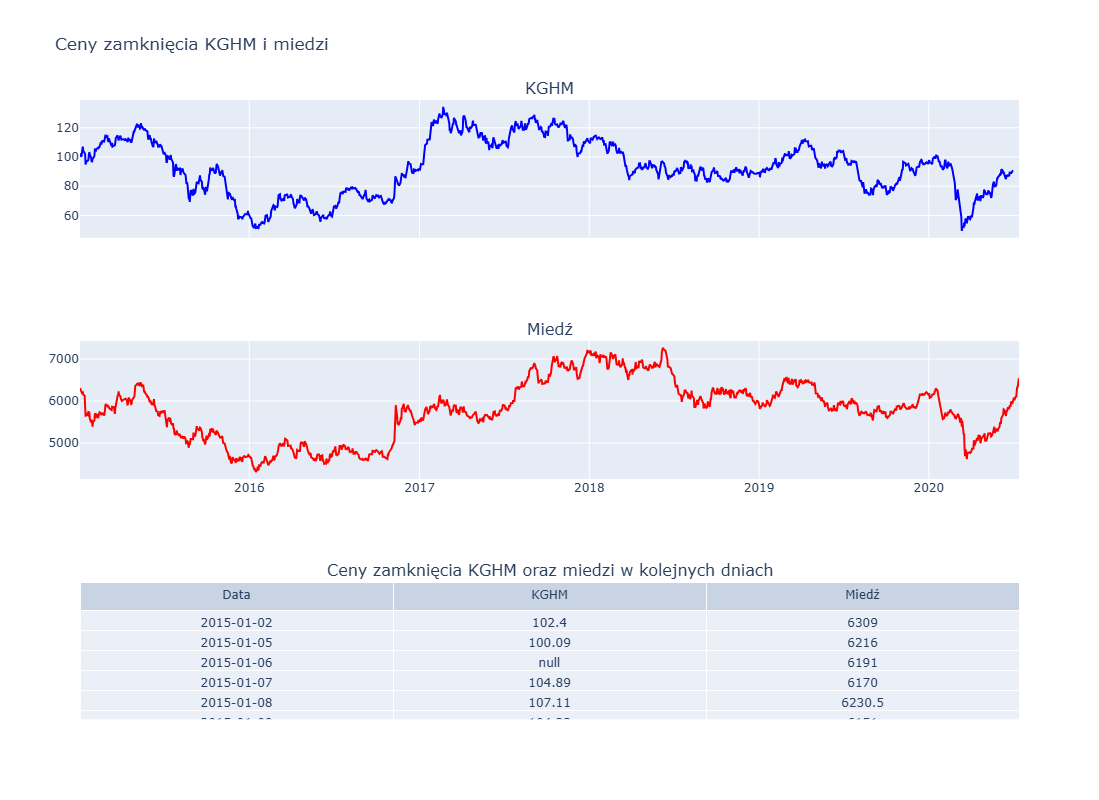

In [26]:
# Wykres KGHM
fig.add_trace(
    go.Scatter(
        x=df_kghm['Data'],
        y=df_kghm['Zamkniecie'],
        mode='lines',
        line=dict(color='blue')
    ),
    row=1, col=1
)

#Wykres Ca
fig.add_trace(
    go.Scatter(
        x=df_ca['Data'],
        y=df_ca['Zamkniecie'],
        mode='lines',
        line=dict(color='red')
    ),
    row=2, col=1
)

#Tabela KGHM/Ca
fig.add_trace(
    go.Table(
         header=dict(
            values=['Data', 'KGHM', 'Miedź'],
         ),
         cells=dict(
            values=[
               df_merged['Data'],
               df_merged['Zamkniecie_KGHM'],
               df_merged['Zamkniecie_Miedz']
            ],
         )
    ),
    row=3, col=1
)

#Ustawienia wykresów
fig.update_layout(
    title="Ceny zamknięcia KGHM i miedzi",
    height=800,  
    showlegend=False
)

#Wyświetlenie wykresów
fig.show()